<a href="https://colab.research.google.com/github/IshanRayen/Heat_Dissipation_Model/blob/main/Heat_Dissipation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heat Dissipation Model** ##

This project seeks to understand and animate the dissipation of heat through an object. It uses the Finite Difference Method and the Heat Equation.

The heat equation is seen below:
$$\frac{\partial u}{\partial t} - \alpha(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2})=0$$

where $\alpha$ is the diffusivity constant and the function is broken into x and y coordinates

The FDM is seen below:
$$f'(a)=\frac{f(a+h)-f(a)}{h}$$

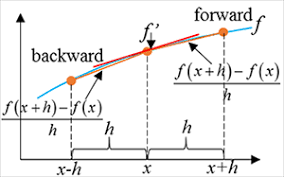

As seen in the image it allows us to approximate the function by continually taking the difference. This is done with this problem.

To solve this we can show the equation u as
$$u(x,y,t)=u^{k}_{i,j}$$
where k is the time step and i and j are x and y respectively.
We can plug this back into the heat equation and simplify it down to the following equation:

$$u^{k+1}_{i,j}=\alpha \frac{\vartriangle{t}}{\vartriangle{x^2}}(u^{k}_{i-1,j}+u^{k}_{i,j+1}+u^{k}_{i,j-1}-4u^{k}_{i,j})+u^{k}_{i,j}$$

This equation is iterated for every time iteration and every x and y coordinate as seen in the function in the code. This spits out a new array for every iteration with a small change based on the coeefcient seen before the parenthesis in the above equation.

The code is seen below for two systems, one with the center of the grid at $100^{\circ C}$ and the second system has the left boundary and right boundary at $100^{\circ C}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
'===========================Initial Conditions================================='
#M creats the grid with is always an MxM grid
#it is the number of iterations. This code creates a new array for every iteration
#so the value of "it" shows the number of arrays showed in the frame

M = 50            #Grid size, each grid will be square so this requires one input
it = 750          #Number of iterations. Increasing it will linearly increase computation time
alpha = 3*10**-3  #Diffusivity constant can be set to anything
delta_x = 1       #Delta x which moves pixel by pixel. Will normally be 1

#decreasing grid size increases the time the animation runs for

'=============================Calculations====================================='
#this calculates the center positions used in the boundaries later ons
#delta t and gamma are also calculated from the alpha and delta x above

c1 = int((M/2)-(M/6))   #creates a left most boundary for the center
c2 = int((M/2)+(M/6))   #creates a right most boundary for the center
delta_t = (delta_x ** 2)/(4 * alpha)        #calcs a delta t based on del x and alpha
gamma = (alpha * delta_t) / (delta_x ** 2)  #takes the coeff seen in the above equation into one var gamma

'==========================Finite Difference Method============================'
#this function takes in the starting array and applies the FDM for each iteration
#and for each pixel in x and y

def finite(V):
    for k in range(0, it-1, 1):
        for i in range(1, M-1, delta_x):
            for j in range(1, M-1, delta_x):
                V[k + 1, i, j] = gamma * (V[k][i+1][j] + V[k][i-1][j]
                                          + V[k][i][j+1] + V[k][i][j-1]
                                          - 4*V[k][i][j]) + V[k][i][j]
    return V

'=============================Heat Map Function================================'
#a function to plot the heat map and the titles / labels included along w a color bar

def plotheatmap(u_k, k):
    plt.clf()
    plt.title("Heat Diffusion")
    plt.xlabel("x (pixel units)")
    plt.ylabel("y (pixel units)")
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin = 0, vmax = 100)
    plt.colorbar(label="Degrees Celcius")
    return plt

In [ ]:
'=========================Center at 100 Deg Celc==============================='
V = np.zeros([it,M,M]) #zero array with time iterations and with size MxM

'===============================Boundaries====================================='

left = 0
right = 0
top = 0
bottom = 0
center = 100

#the array is appended with the values above except on all borders and the center
V[:,:,:1] = left
V[:,:,-1:] = right
V[:,:1,:] = bottom
V[:,-1:,:] = top
V[:,c1:c2,c1:c2]= center

'=============================Calc and Animation==============================='
#the function is called and the animation is run for this array

Vin = finite(V)

def animate(k):
    plotheatmap(Vin[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=it, repeat=False)
plt.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')
anim

In [ ]:
'============================Top at 100 Deg Celc==============================='
Z = np.zeros([it,M,M])

'===============================Boundaries====================================='

left = 100
right = 100
top = 0
bottom = 0
center = 0

Z[:,:,:1] = left
Z[:,:,-1:] = right
Z[:,:1,:] = bottom
Z[:,-1:,:] = top
Z[:,c1:c2,c1:c2]= center

'=============================Calc and Animation==============================='

Zin = finite(Z)

def animate(k):
    plotheatmap(Zin[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=it, repeat=False)
plt.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')
anim

In [ ]:
'============================Top at 100 Deg Celc==============================='
Z = np.zeros([it,M,M])

'===============================Boundaries====================================='

left = 100
right = 0
top = 0
bottom = -100
center = 0

Z[:,:,:1] = left
Z[:,:,-1:] = right
Z[:,:1,:] = bottom
Z[:,-1:,:] = top
Z[:,c1:c2,c1:c2]= center

'=============================Calc and Animation==============================='

Zin = finite(Z)

def plotheatmaptwo(u_k, k):
    plt.clf()
    plt.title("Heat Diffusion")
    plt.xlabel("x (pixel units)")
    plt.ylabel("y (pixel units)")
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin = -100, vmax = 100)
    plt.colorbar(label="Degrees Celcius")
    return plt

def animate(k):
    plotheatmaptwo(Zin[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=it, repeat=False)
plt.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')
anim